<a href="https://colab.research.google.com/github/Adityachaudhary2995/Bostan-House-price-prediction_linear-regression/blob/main/Bostan_house_price_prediction_24/afi/18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Bostan House price prediction

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Creating object for training set DataFrame
Train_DF = pd.read_csv('train.csv')

# Displaying first 5 rows of the DataFrame
Train_DF.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
# Getting information regarding the types of data
Train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
# Checking if there is any empty row in particular or not
Train_DF.isna().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [5]:
# Training model on original data
X0 = Train_DF.iloc[:,1:14].values
Y0 = Train_DF.iloc[:,-1].values
LR0 = LinearRegression()
LR0.fit(X0,Y0)
print("Intercept : ", LR0.intercept_)
print("Slope : ", LR0.coef_)

Intercept :  34.04543776350591
Slope :  [-5.24893379e-02  4.74448677e-02  5.38552422e-02  3.78486439e+00
 -1.57396571e+01  3.76883175e+00 -4.62660241e-03 -1.54882312e+00
  3.28967093e-01 -1.28664959e-02 -8.56975746e-01  1.16659048e-02
 -6.00315456e-01]


In [6]:
# Evaluating model
Y0_pred = LR0.predict(X0)
RMSE0 = np.sqrt(mean_squared_error(Y0,Y0_pred))
print("Root Mean Square Error : ", RMSE0)

Root Mean Square Error :  4.731759654044982


<Axes: >

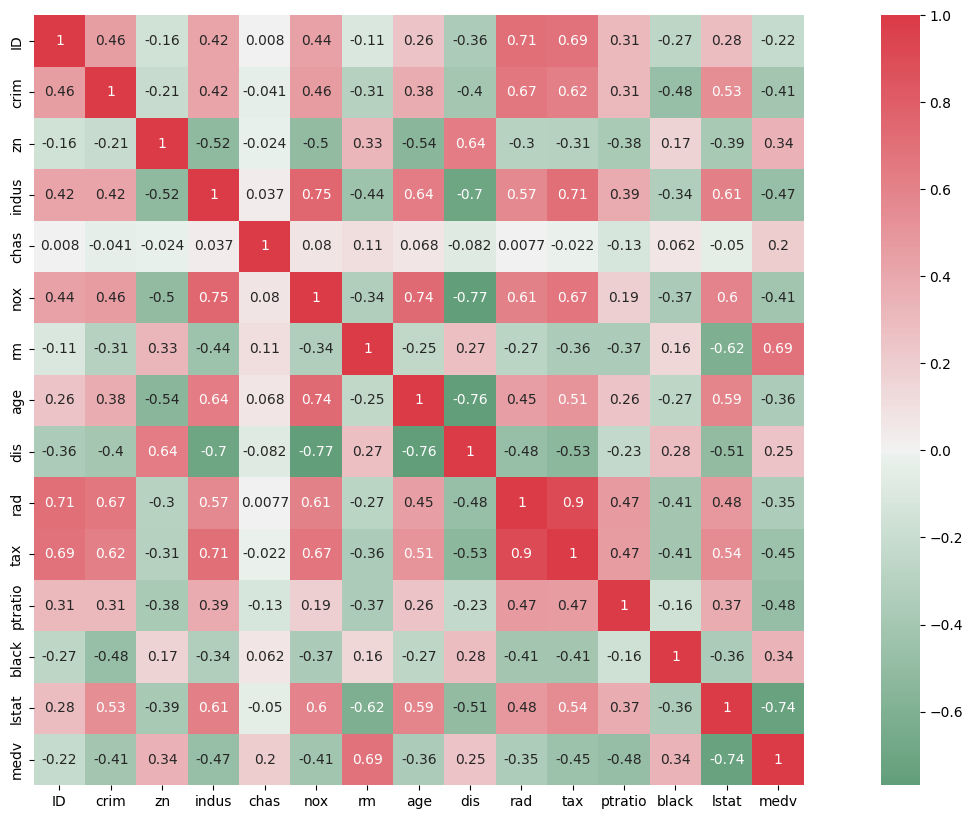

In [7]:
# Correlation Matric for Feature Selection
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(Train_DF.corr(),cmap=cmap,center=0,square=True,annot=True)

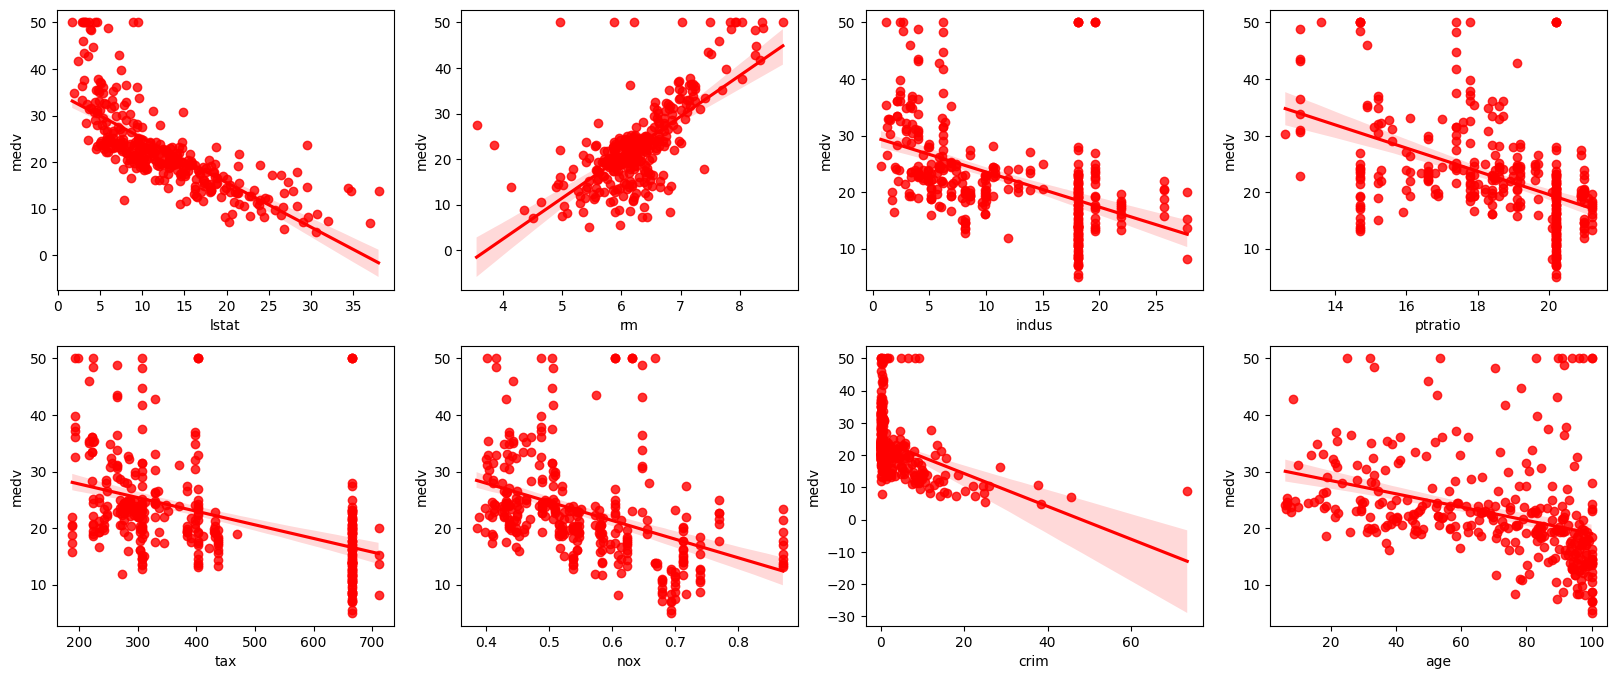

In [8]:
# Plots for analysing relationship among features
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,8))
cols = ['lstat','rm','indus','ptratio','tax','nox','crim','age']
for col,ax in zip(cols,axs.flat):
    sns.regplot(x=Train_DF[col],y=Train_DF['medv'],color = 'red',ax=ax)

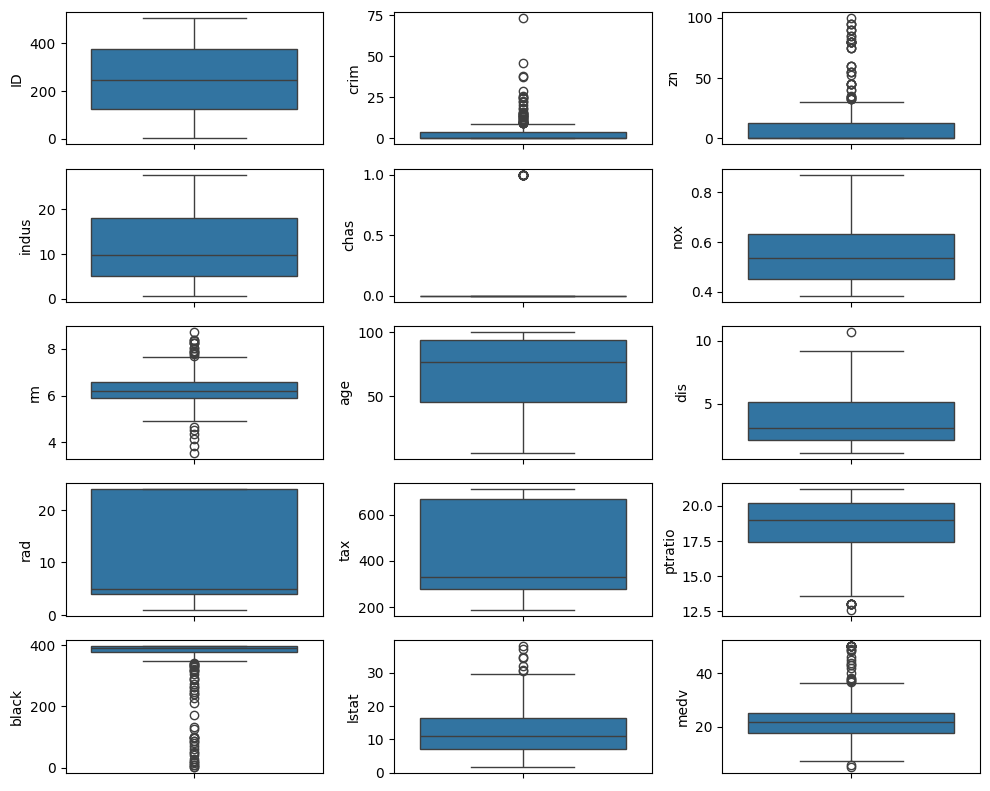

In [9]:
# Box-plots for visualizing outlier
fig, axs = plt.subplots(nrows=5,ncols=3,figsize=(10,8))
index = 0
axs = axs.flatten()
for k,v in Train_DF.items():
    sns.boxplot(y=k,data=Train_DF,ax=axs[index])
    index+=1
plt.tight_layout()

In [10]:
# Removing Outliers
Train_DF=Train_DF[~((Train_DF['crim']>=25))]
Train_DF=Train_DF[~((Train_DF['rm']>=8.5)|(Train_DF['rm']<4))]
Train_DF=Train_DF[~((Train_DF['lstat']>=30))]

In [11]:
# Feature selection
X = Train_DF[['lstat','rm','indus','ptratio','tax','nox','crim','age']].values
Y = Train_DF[['medv']].values

In [12]:
# Training
LR = LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [13]:
print("Intercept : ", LR.intercept_)
print("Slope : ", LR.coef_)

Intercept :  [12.16872968]
Slope :  [[-7.19484858e-01  5.34359785e+00  1.26504710e-01 -7.81817665e-01
  -2.89044912e-03 -2.60911011e+00  5.63687328e-02  1.86447916e-02]]


In [14]:
# Model Evaluation after Feature Selection
Y_pred = LR.predict(X)
RMSE = np.sqrt(mean_squared_error(Y,Y_pred))
print("Root Mean Square Error : ", RMSE)

Root Mean Square Error :  4.916284302163122


In [15]:
# Prediction for Test Dataset
Test_DF = pd.read_csv('test.csv')
X_test = Test_DF[['lstat','rm','indus','ptratio','tax','nox','crim','age']].values
Y_test_pred = LR.predict(X_test)
for x, y in zip(Test_DF['ID'],Y_test_pred):
    print(x, y, sep='\t\t')

3		[33.85856388]
6		[27.69481744]
8		[20.01705336]
9		[9.44659407]
10		[20.40553285]
18		[17.51003005]
20		[18.31295909]
25		[16.21387453]
26		[14.17458613]
27		[16.61750091]
29		[21.79014061]
30		[23.21717856]
33		[7.9538319]
34		[13.58671836]
36		[21.81756194]
37		[19.95633294]
38		[21.53185882]
42		[29.96108933]
49		[5.67990036]
53		[29.28961304]
60		[21.33678643]
63		[26.33954371]
70		[21.84123223]
72		[21.64610633]
79		[22.30848147]
80		[22.40932351]
83		[25.44815008]
92		[26.33351513]
93		[27.4054216]
96		[28.20410204]
98		[38.01506739]
99		[36.41377436]
100		[32.84646915]
105		[20.21357106]
106		[15.67085348]
111		[19.21559717]
113		[18.51572554]
114		[18.89126578]
116		[18.83472569]
126		[21.41049371]
130		[14.21401783]
131		[22.77875668]
133		[23.37949168]
136		[18.98376141]
141		[12.84234145]
144		[12.02103385]
145		[6.82168615]
147		[19.79588876]
152		[20.98645504]
153		[19.48178784]
156		[23.52206157]
158		[36.09274837]
163		[42.65323497]
169		[28.11095763]
185		[18.2985838